## **Intro:** 
In this project I will be reattempting to use the workout data from my previous project. This time I will be using **Calories_Burned** as the target variable. I think this will work much be for modeling as a continious varible. The dataset is from [Kaggle](https://www.kaggle.com/datasets/valakhorasani/gym-members-exercise-dataset). The variables in this dataset include:
- **Age**
- **Gender**
- **Weight (kg)** 
- **Height (m)**
- **Session_Duration (hours)**
- **Calories_Burned** (Target)
- **Workout_Type**
- **Fat_Percentage**
- **Water_Intake (liters)**
- **Workout_Frequency (days/week)** 
- **Experience_Level**
- **BMI**

Research Question: *How do these variables relate to the amount of calories burnerd by the individual?*

In [222]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import boxcox
from sklearn.preprocessing import StandardScaler

df = pd.read_csv('C:/Users/Jakeg/Downloads/archive (2)/gym_members_exercise_tracking.csv')
df.head()





,Age,Gender,Weight (kg),Height (m),Max_BPM,Avg_BPM,Resting_BPM,Session_Duration (hours),Calories_Burned,Workout_Type,Fat_Percentage,Water_Intake (liters),Workout_Frequency (days/week),Experience_Level,BMI
0,56,Male,88.30000,1.71000,180,157,60,1.69000,"1,313.00000",Yoga,12.60000,3.50000,4,3,30.20000
1,46,Female,74.90000,1.53000,179,151,66,1.30000,883.00000,HIIT,33.90000,2.10000,4,2,32.00000
2,32,Female,68.10000,1.66000,167,122,54,1.11000,677.00000,Cardio,33.40000,2.30000,4,2,24.71000
3,25,Male,53.20000,1.70000,190,164,56,0.59000,532.00000,Strength,28.80000,2.10000,3,1,18.41000
4,38,Male,46.10000,1.79000,188,158,68,0.64000,556.00000,Strength,29.20000,2.80000,3,1,14.39000


In [224]:
holdout_proportion = 0.2
size_without_holdout = int(len(df)*(1 - holdout_proportion))
df_holdout = df.iloc[size_without_holdout:,:].copy()
df_train = df.iloc[:size_without_holdout,:].copy()

target = df_train['Calories_Burned']
target_holdout = df_holdout['Calories_Burned']

features = df_train.drop(columns= ['Calories_Burned']).copy() # drops target column
features_holdout = df_holdout.drop(columns=['Calories_Burned']).copy()
features

,Age,Gender,Weight (kg),Height (m),Max_BPM,Avg_BPM,Resting_BPM,Session_Duration (hours),Workout_Type,Fat_Percentage,Water_Intake (liters),Workout_Frequency (days/week),Experience_Level,BMI
0,56,Male,88.30000,1.71000,180,157,60,1.69000,Yoga,12.60000,3.50000,4,3,30.20000
1,46,Female,74.90000,1.53000,179,151,66,1.30000,HIIT,33.90000,2.10000,4,2,32.00000
2,32,Female,68.10000,1.66000,167,122,54,1.11000,Cardio,33.40000,2.30000,4,2,24.71000
3,25,Male,53.20000,1.70000,190,164,56,0.59000,Strength,28.80000,2.10000,3,1,18.41000
4,38,Male,46.10000,1.79000,188,158,68,0.64000,Strength,29.20000,2.80000,3,1,14.39000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
773,58,Male,90.20000,1.72000,199,150,55,0.90000,HIIT,28.30000,2.10000,2,1,30.49000
774,29,Male,84.90000,1.72000,187,140,51,1.79000,Yoga,14.30000,3.50000,4,3,28.70000
775,43,Male,95.70000,1.77000,198,151,50,1.08000,HIIT,24.20000,3.40000,3,1,30.55000
776,51,Male,59.00000,1.65000,198,153,53,1.22000,HIIT,20.70000,2.30000,3,2,21.67000


In [226]:
#create dummy varaible for gender
features = pd.get_dummies(features, columns = ['Gender'], drop_first = True, dtype = 'int64')
#repeat for holdout 

features_holdout = pd.get_dummies(features_holdout, columns = ['Gender'], drop_first = True, dtype = 'int64')


In [228]:
#check dummy variable 
features

,Age,Weight (kg),Height (m),Max_BPM,Avg_BPM,Resting_BPM,Session_Duration (hours),Workout_Type,Fat_Percentage,Water_Intake (liters),Workout_Frequency (days/week),Experience_Level,BMI,Gender_Male
0,56,88.30000,1.71000,180,157,60,1.69000,Yoga,12.60000,3.50000,4,3,30.20000,1
1,46,74.90000,1.53000,179,151,66,1.30000,HIIT,33.90000,2.10000,4,2,32.00000,0
2,32,68.10000,1.66000,167,122,54,1.11000,Cardio,33.40000,2.30000,4,2,24.71000,0
3,25,53.20000,1.70000,190,164,56,0.59000,Strength,28.80000,2.10000,3,1,18.41000,1
4,38,46.10000,1.79000,188,158,68,0.64000,Strength,29.20000,2.80000,3,1,14.39000,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
773,58,90.20000,1.72000,199,150,55,0.90000,HIIT,28.30000,2.10000,2,1,30.49000,1
774,29,84.90000,1.72000,187,140,51,1.79000,Yoga,14.30000,3.50000,4,3,28.70000,1
775,43,95.70000,1.77000,198,151,50,1.08000,HIIT,24.20000,3.40000,3,1,30.55000,1
776,51,59.00000,1.65000,198,153,53,1.22000,HIIT,20.70000,2.30000,3,2,21.67000,1


## 1. Explanatory Data Analysis

### 1.1 Visualizing feature distributions

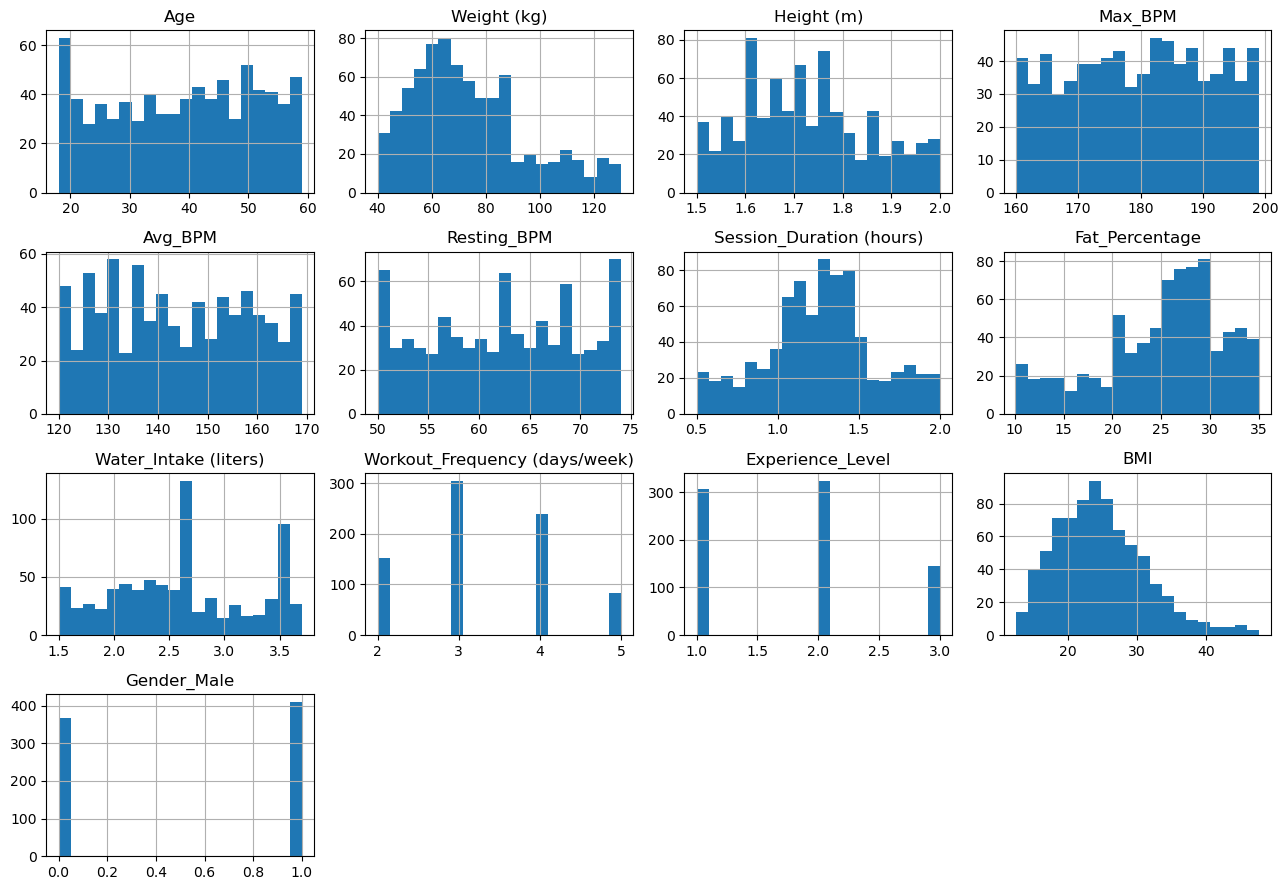

In [232]:
# plot the distributions of all features
features.hist(bins=20, figsize=(13, 9))
plt.tight_layout()
plt.show()

### 1.2 Key statistics

In [234]:
def eda_summary(df):
    numeric = features.select_dtypes(include=['float', 'int64']).columns
    return pd.DataFrame({
        'Mean': df[numeric].mean().round(2),
        'Std': df[numeric].std().round(2),
        'Median': df[numeric].median(),
        'Missing Values': df[numeric].isna().sum(),
        'Zero Values': (df[numeric] == 0).sum(),
        'Proportion Zero Values': ((df[numeric] == 0).sum() / len(df)).round(2),
        'Unique Values': df[numeric].nunique()
    })

features_summary = eda_summary(features)
features_summary

,Mean,Std,Median,Missing Values,Zero Values,Proportion Zero Values,Unique Values
Age,38.83000,12.12000,40.00000,0,0,0.00000,42
Weight (kg),73.84000,21.28000,69.70000,0,0,0.00000,462
Height (m),1.72000,0.13000,1.71000,0,0,0.00000,51
Max_BPM,179.85000,11.47000,180.00000,0,0,0.00000,40
Avg_BPM,143.75000,14.33000,143.00000,0,0,0.00000,50
Resting_BPM,62.18000,7.28000,62.00000,0,0,0.00000,25
Session_Duration (hours),1.26000,0.34000,1.27000,0,0,0.00000,147
Fat_Percentage,25.10000,6.26000,26.30000,0,0,0.00000,218
Water_Intake (liters),2.62000,0.60000,2.60000,0,0,0.00000,23
Workout_Frequency (days/week),3.32000,0.91000,3.00000,0,0,0.00000,4


## 2. Pre-processing 

### 2.1 Categorizing features 

In [240]:
numeric = features.select_dtypes(include=['float', 'int64']).columns.tolist()
create_binary = []
categorical = []
datetime = []

for column in features_summary.index:
    if features_summary.loc[column,'Proportion Zero Values'] >= 0.5:
        create_binary.append(column)
    elif features_summary.loc[column, 'Unique Values'] <= 15: # 15 is based on the number of classes in 'MSSubClass'; if a feature has 15 or less classes, it should be considered a categorical variable
        categorical.append(column)
    if 'Year' in column or 'Yr' in column: 
        datetime.append(column)

# Adjust lists to avoid duplicate categorizing
categorical = [col for col in categorical if col not in datetime]
continuous = [col for col in numeric if col not in categorical and col not in datetime]

# Print out the classified lists
print("Numeric (Continuous):", continuous)
print("Create Binary:", create_binary)
print("Categorical:", categorical)
print("Datetime:", datetime)


Numeric (Continuous): ['Age', 'Weight (kg)', 'Height (m)', 'Max_BPM', 'Avg_BPM', 'Resting_BPM', 'Session_Duration (hours)', 'Fat_Percentage', 'Water_Intake (liters)', 'BMI']
Create Binary: []
Categorical: ['Workout_Frequency (days/week)', 'Experience_Level', 'Gender_Male']
Datetime: []


No Binary or datetime variables. 

In [244]:
for column in categorical:
    features[column] = features[column].astype(str)

features = pd.get_dummies(features, drop_first=True, dtype='int64')

In [246]:
for column in categorical:
    features_holdout[column] = features_holdout[column].astype(str)

features_holdout = pd.get_dummies(features_holdout, drop_first=True, dtype='int64')

In [248]:
# Align features_holdout to features
features, features_holdout = features.align(features_holdout, join='left', axis=1, fill_value=0)

### 2.2 Skewness

In [251]:
# observe the skew of all continuous variables
skewness = features[continuous].skew()
print(skewness)

Age                        -0.10810
Weight (kg)                 0.74910
Height (m)                  0.31169
Max_BPM                    -0.05664
Avg_BPM                     0.07198
Resting_BPM                -0.06230
Session_Duration (hours)   -0.03303
Fat_Percentage             -0.66376
Water_Intake (liters)       0.07401
BMI                         0.70084
dtype: float64


None of the observed skewness in the observed variables is > 1. Therefore a box-cox transformation is not needed. 

### 2.3 Scaling variables 

In [255]:
scaler = StandardScaler()

features_scaled = features.copy()
features_scaled[continuous] = scaler.fit_transform(features_scaled[continuous])
features_scaled



,Age,Weight (kg),Height (m),Max_BPM,Avg_BPM,Resting_BPM,Session_Duration (hours),Fat_Percentage,Water_Intake (liters),BMI,Workout_Type_HIIT,Workout_Type_Strength,Workout_Type_Yoga,Workout_Frequency (days/week)_3,Workout_Frequency (days/week)_4,Workout_Frequency (days/week)_5,Experience_Level_2,Experience_Level_3,Gender_Male_1
0,1.41732,0.67977,-0.11380,0.01324,0.92568,-0.29925,1.27942,-1.99587,1.46092,0.82046,0,0,1,0,1,0,0,1,1
1,0.59178,0.04964,-1.50691,-0.07404,0.50665,0.52489,0.12389,1.40618,-0.85832,1.09519,1,0,0,0,1,0,1,0,0
2,-0.56398,-0.27013,-0.50078,-1.12138,-1.51868,-1.12340,-0.43907,1.32632,-0.52700,-0.01748,0,0,0,0,1,0,1,0,0
3,-1.14186,-0.97080,-0.19120,0.88602,1.41455,-0.84868,-1.97978,0.59160,-0.85832,-0.97906,0,1,0,1,0,0,0,0,1
4,-0.06865,-1.30468,0.50535,0.71146,0.99552,0.79960,-1.83164,0.65549,0.30130,-1.59263,0,1,0,1,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
773,1.58243,0.76912,-0.03641,1.67152,0.43681,-0.98604,-1.06128,0.51174,-0.85832,0.86472,1,0,0,0,0,0,0,0,1
774,-0.81164,0.51988,-0.03641,0.62418,-0.26158,-1.53547,1.57571,-1.72434,1.46092,0.59151,0,0,1,0,1,0,0,1,1
775,0.34412,1.02775,0.35057,1.58424,0.50665,-1.67282,-0.52795,-0.14311,1.29526,0.87388,1,0,0,1,0,0,0,0,1
776,1.00455,-0.69806,-0.57817,1.58424,0.64632,-1.26075,-0.11315,-0.70213,-0.52700,-0.48148,1,0,0,1,0,0,1,0,1


In [257]:
#Repeat for holdout 
features_scaled_holdout = features_holdout.copy()
features_scaled_holdout[continuous] = scaler.fit_transform(features_scaled_holdout[continuous])
features_scaled_holdout

,Age,Weight (kg),Height (m),Max_BPM,Avg_BPM,Resting_BPM,Session_Duration (hours),Fat_Percentage,Water_Intake (liters),BMI,Workout_Type_HIIT,Workout_Type_Strength,Workout_Type_Yoga,Workout_Frequency (days/week)_3,Workout_Frequency (days/week)_4,Workout_Frequency (days/week)_5,Experience_Level_2,Experience_Level_3,Gender_Male_1
778,0.39581,-0.96059,0.04878,-0.59725,1.12042,1.14824,-0.60380,0.91704,-0.61806,-1.00268,0,1,0,0,1,0,1,0,0
779,0.47647,0.60730,2.11681,1.44300,1.60609,-1.65560,1.13012,-2.05985,1.43921,-0.41850,0,0,1,0,0,1,0,1,1
780,-0.97527,-0.05236,-0.36482,-1.44736,-1.58545,-1.65560,0.33196,1.68942,-1.30382,0.11889,0,1,0,0,0,0,0,0,0
781,0.39581,-0.36307,0.46239,-0.25721,0.91228,-0.72098,0.63471,1.31932,-1.64670,-0.58156,1,0,0,0,1,0,1,0,0
782,0.07321,-0.85542,-0.94387,0.33786,0.49599,0.88120,-0.98912,1.30323,-1.13238,-0.48089,0,0,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
968,-1.13657,0.63120,0.21423,0.59289,0.98166,0.61417,0.88241,-2.33341,1.43921,0.49747,0,1,0,0,1,0,0,1,1
969,-1.05592,-0.34873,-0.86115,0.33786,1.53671,-0.85450,0.35949,0.08029,0.58201,0.06075,0,1,0,0,0,0,0,0,1
970,1.68624,-0.64510,0.37967,1.18797,-1.65484,-1.25505,1.29525,-0.91737,0.06770,-0.81694,0,0,0,0,0,1,0,1,0
971,-0.49135,2.50979,0.95872,1.52801,0.14908,-0.05341,-0.41114,0.59521,-0.96094,1.76934,1,0,0,1,0,0,1,0,1


## 3. Feature Engineering 

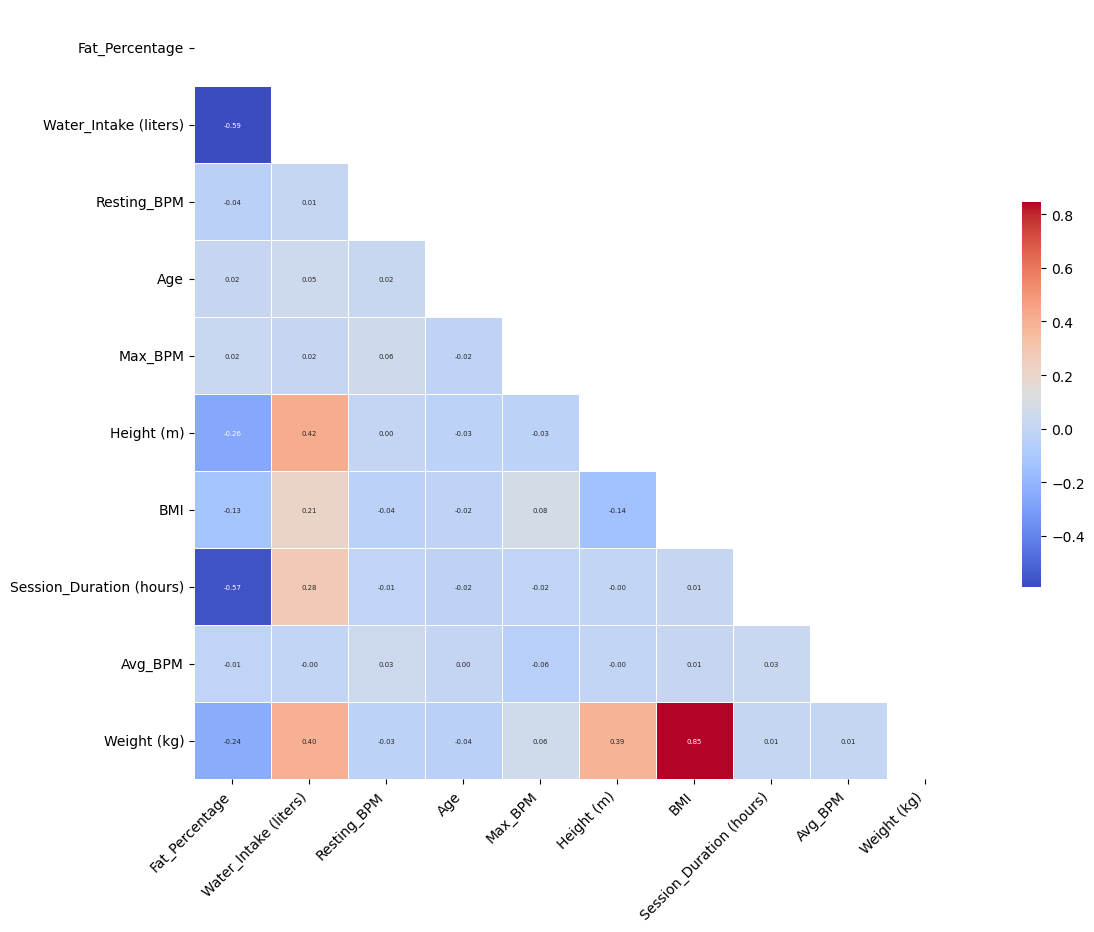

In [260]:
# Looking for highly correlated features
corr_columns = list(set(continuous))
corr_mat = features_scaled[corr_columns].corr()

plt.figure(figsize=(15, 10))
plt.tight_layout()
mask = np.triu(np.ones_like(corr_mat, dtype=bool))
sns.heatmap(corr_mat, mask=mask, cmap='coolwarm', annot=True, fmt=".2f", annot_kws={'size': 5}, square=True, linewidths=.5, cbar_kws={"shrink": .5})
plt.xticks(rotation=45, ha='right')
plt.show()

## 4. Model Building 

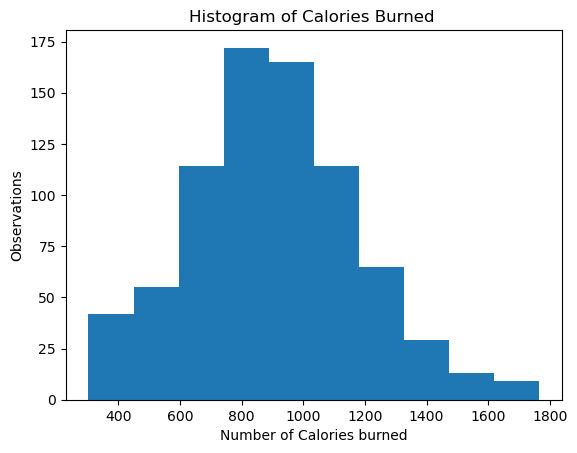

In [263]:
#start by looking at target variable
plt.hist(target)
plt.title('Histogram of Calories Burned ')
plt.xlabel('Number of Calories burned')
plt.ylabel('Observations')
plt.show()

In [265]:
skewness_target = target.skew()
print(skewness_target)

0.2536626653541304


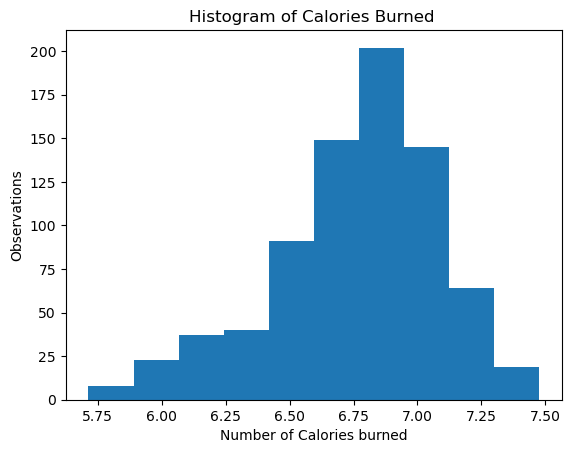

In [267]:
log_target = np.log(target)
plt.hist(log_target)
plt.title('Histogram of Calories Burned ')
plt.xlabel('Number of Calories burned')
plt.ylabel('Observations')
plt.show()

In [269]:
skewness_log_target = log_target.skew()
print(skewness_log_target)

-0.6386985099198788


Taking the log increased the skewness of the target variable so I will go with the original target. However in order to avoid issues with 

In [272]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error


from sklearn.linear_model import LinearRegression
from sklearn.linear_model import ElasticNet
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor


n_folds = 5

### 4.1 Linear regression

In [275]:
# Initialize the LinearRegression model
lm = LinearRegression()
cv_scores = cross_val_score(lm, features_scaled, log_target, cv=n_folds, scoring='neg_mean_squared_error')

# Convert scores to positive MSE, then calculate the square root to get RMSE
cv_scores_rmse = np.sqrt(-cv_scores)

# Calculate the average and standard deviation of the RMSE scores
mean_cv_score_rmse = np.mean(cv_scores_rmse)
std_cv_score_rmse = np.std(cv_scores_rmse)

print(f'Average CV Score (Root Mean Squared Error): {mean_cv_score_rmse:,.4f}')

Average CV Score (Root Mean Squared Error): 0.0520


### 4.2 ElasticNet

In [278]:
# Initialize the ElasticNet model
elastic_net_model = ElasticNet(max_iter=10000)

# Define the grid of hyperparameters to search
param_grid = {
    'alpha': [0.1, 0.5, 1.0, 2.0],  # Regularization strength
    'l1_ratio': np.arange(0.0, 1.2, 0.2)  # The ElasticNet mixing parameter, with 0 <= l1_ratio <= 1
}

# Set up the GridSearchCV object with negative mean squared error as the scoring method
grid_search_en = GridSearchCV(estimator=elastic_net_model, param_grid=param_grid, cv=n_folds, 
                              scoring='neg_mean_squared_error', verbose=1, n_jobs=-1)

# Fit the GridSearchCV object to the scaled features and log-target
grid_search_en.fit(features_scaled, log_target)

# Get the best parameters and negative MSE score
best_params_en = grid_search_en.best_params_
best_score_en = -grid_search_en.best_score_  # Convert to positive MSE

# Convert the best MSE score to RMSE
best_score_rmse_en = np.sqrt(best_score_en)

print(f'Best parameters found for Elastic Net: {best_params_en}')
print(f'Best CV Score (Root Mean Squared Error for Elastic Net with GridSearch): {best_score_rmse_en:,.4f}')

# The best estimator can be used for predictions or further analysis
best_en_model = grid_search_en.best_estimator_

Fitting 5 folds for each of 24 candidates, totalling 120 fits
Best parameters found for Elastic Net: {'alpha': 0.1, 'l1_ratio': 0.0}
Best CV Score (Root Mean Squared Error for Elastic Net with GridSearch): 0.0685


C:\Users\Jakeg\anaconda3\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:678: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.888e+00, tolerance: 8.080e-03 Linear regression models with null weight for the l1 regularization term are more efficiently fitted using one of the solvers implemented in sklearn.linear_model.Ridge/RidgeCV instead.
  model = cd_fast.enet_coordinate_descent(


### 4.2 SVM

In [281]:
svm_model = SVR()
param_grid = {
    'C': [0.1, 1.0, 10.0, 25.0],  # Regularization parameter
    'epsilon': [0.01, 0.1, 0.5],  # Epsilon in the epsilon-SVR model
    'kernel': ['poly', 'rbf', 'sigmoid']  # Specifies the kernel type to be used in the algorithm
}

# Set up the GridSearchCV object
grid_search_svm = GridSearchCV(estimator=svm_model, param_grid=param_grid, cv=n_folds, 
                               scoring='neg_mean_squared_error', verbose=1, n_jobs=-1)
grid_search_svm.fit(features_scaled, log_target)

# Get the best parameters and scores
best_params_svm = grid_search_svm.best_params_
best_score_svm = -grid_search_svm.best_score_

# Convert the best MSE score to RMSE
best_score_rmse_svm = np.sqrt(best_score_svm)

print(f'Best parameters found for SVM: {best_params_svm}')
print(f'Best CV Score (Root Mean Squared Error for SVM with GridSearch): {best_score_rmse_svm:,.4f}')

# The best estimator can be used for predictions or further analysis
best_svm_model = grid_search_svm.best_estimator_

Fitting 5 folds for each of 36 candidates, totalling 180 fits
Best parameters found for SVM: {'C': 10.0, 'epsilon': 0.01, 'kernel': 'rbf'}
Best CV Score (Root Mean Squared Error for SVM with GridSearch): 0.0556


### 4.3 Decision Tree

In [202]:
# Initialize the DecisionTreeRegressor model
decision_tree_model = DecisionTreeRegressor()

# Define the grid of hyperparameters to search
param_grid = {
    'max_depth': [5, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['sqrt', 'log2']
}

# Set up the GridSearchCV object
grid_search_dt = GridSearchCV(estimator=decision_tree_model, param_grid=param_grid, cv=n_folds,
                              scoring='neg_mean_squared_error', verbose=1, n_jobs=-1)

# Fit the GridSearchCV object to the data
grid_search_dt.fit(features_scaled, log_target)

# Get the best parameters and scores
best_params_dt = grid_search_dt.best_params_
best_score_dt = -grid_search_dt.best_score_

# Convert the best MSE score to RMSE
best_score_rmse_dt = np.sqrt(best_score_dt)

print(f'Best parameters found for Regression Tree: {best_params_dt}')
print(f'Best CV Score (Root Mean Squared Error for Regression Tree with GridSearch): {best_score_rmse_dt:,.4f}')

# The best estimator can be used for predictions or further analysis
best_dt_model = grid_search_dt.best_estimator_

Fitting 5 folds for each of 72 candidates, totalling 360 fits
Best parameters found for Regression Tree: {'max_depth': 20, 'max_features': 'sqrt', 'min_samples_leaf': 2, 'min_samples_split': 5}
Best CV Score (Root Mean Squared Error for Regression Tree with GridSearch): 0.1407


### Random Forest

In [204]:
# Initialize the RandomForestRegressor model
random_forest_model = RandomForestRegressor(random_state=42)

# Define the grid of hyperparameters to search
param_grid = {
    'n_estimators': [50, 100, 200],  # Number of trees
    'max_depth': [10, 20, 30],  # Maximum depth of trees
    'min_samples_split': [2, 5, 10],  # Minimum number of samples required to split an internal node
    'min_samples_leaf': [1, 2, 4]  # Minimum number of samples required to be at a leaf node
}

# Set up the GridSearchCV object
grid_search_rf = GridSearchCV(estimator=random_forest_model, param_grid=param_grid, cv=n_folds, 
                              scoring='neg_mean_squared_error', verbose=1, n_jobs=-1)

# Fit the GridSearchCV object to the data
grid_search_rf.fit(features_scaled, log_target)

# Get the best parameters and scores
best_params_rf = grid_search_rf.best_params_
best_score_rf = -grid_search_rf.best_score_

# Convert the best MSE score to RMSE
best_score_rmse_rf = np.sqrt(best_score_rf)

print(f'Best parameters found for Random Forest: {best_params_rf}')
print(f'Best CV Score (Root Mean Squared Error for Random Forest with GridSearch): {best_score_rmse_rf:,.4f}')

# The best estimator can be used for predictions or further analysis
best_rf_model = grid_search_rf.best_estimator_

Fitting 5 folds for each of 81 candidates, totalling 405 fits
Best parameters found for Random Forest: {'max_depth': 10, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 200}
Best CV Score (Root Mean Squared Error for Random Forest with GridSearch): 0.0540


### Model Evaluation

In [206]:
scores = {
    'Model': ['ElasticNet', 'SVM', 'Decision Tree', 'Random Forest'],
    'Mean 5-fold CV Score (RMSE)': [    # Mean 5-fold CV Score (RMSE) after GridSearch
        best_score_rmse_en,
        best_score_rmse_svm,
        best_score_rmse_dt,
        best_score_rmse_rf,
    ]}

# Convert the dictionary into a DataFrame
scores_df = pd.DataFrame(scores)
scores_df.sort_values(by='Mean 5-fold CV Score (RMSE)', ascending= True, inplace=True)
pd.options.display.float_format = '{:,.5f}'.format

# Display the DataFrame
scores_df

,Model,Mean 5-fold CV Score (RMSE)
3,Random Forest,0.05400
1,SVM,0.05707
0,ElasticNet,0.06717
2,Decision Tree,0.14073
